## Part I: Using PCA to project 2-D data onto its principal axes

Here, you will illustrate how you can use PCA to transform your 2-D data to represent it in terms of its principal axes - the projection of your data onto the two orthogonal directions that explain most of the variance in your data. Let's see what all of this means.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

**Lets generate dataset**</br>
\begin{bmatrix}
3 & 2 \\
2 & 2
\end{bmatrix}
Data with mean [0, 0] and main diagonal represents `variance` of two variables i.e. (3, 2) and off-digonal (2, 2) represents `covariance`

In [2]:
np.random.seed(42)
mean = [0, 0]
cov = [[3, 2], [2, 2]]
X = np.random.multivariate_normal(mean=mean, cov=cov, size=200)

**Lets visualize above data**

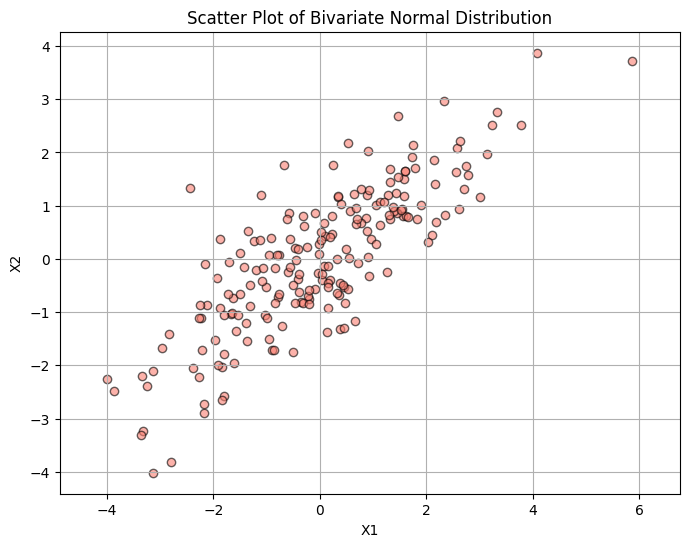

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='salmon', ec='k', alpha=0.6)
plt.title('Scatter Plot of Bivariate Normal Distribution')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True)
plt.axis('equal')
plt.show()

**Perform PCA on the dataset**

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**Lets plot data after `PCA` operation**

Text(0.5, 1.0, 'Scatter Plot of PCA Data')

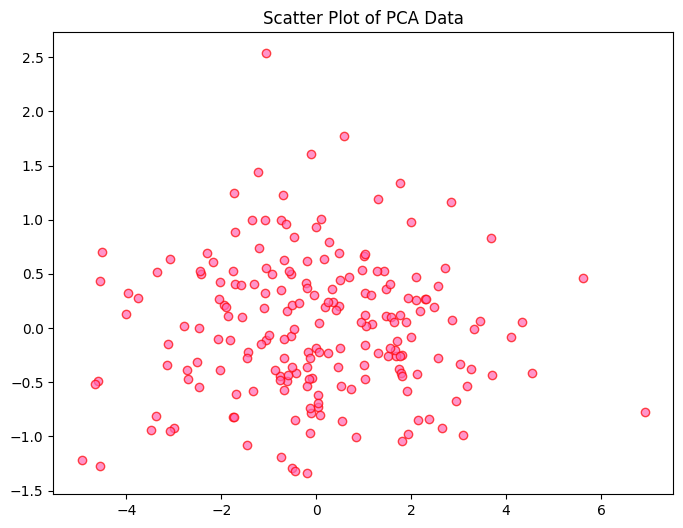

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='hotpink', ec='r', alpha=0.7)
plt.title('Scatter Plot of PCA Data')

**Get the principal components from the model**</br>

The principal components are the principal axes, represented in feature space coordinates, which align with the directions of maximum variance in your data.

In [6]:
components = pca.components_
components

array([[ 0.78215821,  0.62307987],
       [-0.62307987,  0.78215821]])

In [7]:
pca.explained_variance_ratio_

array([0.9111946, 0.0888054])

From above result, the first component explains over 90% of the variance in the data, while the second explains about 9%.</br>
Since first `PC` principle component captures more than 90% of information and second `PC` captures more than 8%. In real scenario if two or three features capture more than 90 or 95% of the information, than we can neglect other features.

****Project the data onto its principal component axes**

The projection of the data onto a given principal component yields the coordinates of each of the data points along that component's direction.

The new coordinates are given by the dot products of each point's coordinates with the given PCA component.

Specifically, the projections are given by:

In [8]:
projection_pc1 = np.dot(X, components[0])
projection_pc2 = np.dot(X, components[1])

In [9]:
x_pc1 = projection_pc1*components[0, 0]
y_pc1 = projection_pc1*components[0, 1]
x_pc2 = projection_pc2*components[1, 0]
y_pc2 = projection_pc2*components[1, 1]

**Lets plot result**

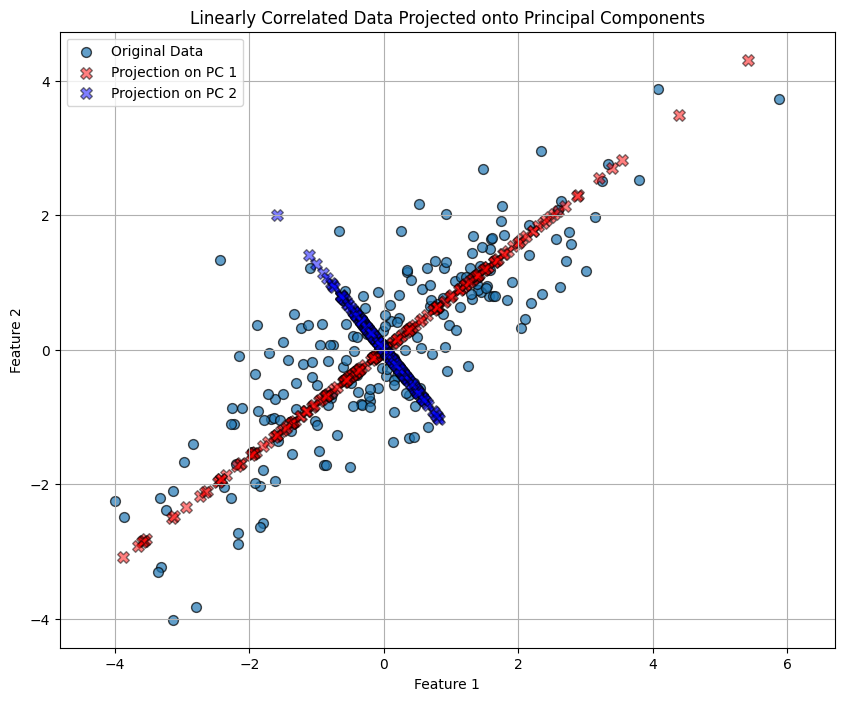

In [10]:
plt.figure(figsize=(10, 8))
#Plot original data
plt.scatter(X[:, 0], X[:, 1], label='Original Data', ec='k', alpha=0.7, s=50)

# Plot the projections along PC1 and PC2
plt.scatter(x_pc1, y_pc1, c='r', ec='k', marker='X', s = 70, alpha=0.5, label='Projection on PC 1')
plt.scatter(x_pc2, y_pc2, c='b', ec='k', marker='X', s = 70, alpha=0.5, label='Projection on PC 2')
plt.title('Linearly Correlated Data Projected onto Principal Components', )
plt.xlabel('Feature 1',)
plt.ylabel('Feature 2',)
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

**The data varies in two main directions.**

* The first direction, in red, is aligned in the direction having the widest variation.
* The second direction, in blue, is perpendicular to first and has a lower variance.


## Part II. PCA for feature space dimensionality reduction
For this second application, you'll use PCA to project the four-dimensional Iris feature data set down onto a two-dimensional feature space.

This will have the added benefit of enabling you to visualize some of the most important structures in the dataset.

**Load `iris` dataset**

In [101]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
X_scaled = StandardScaler().fit_transform(X)

**Iris Flower Names**

In [102]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**Initialize a PCA model and reduce the Iris data set dimensionality to two components**

In [103]:
pca_1 = PCA(n_components=2)
X_pca_1 = pca_1.fit_transform(X)

**Plot the result**

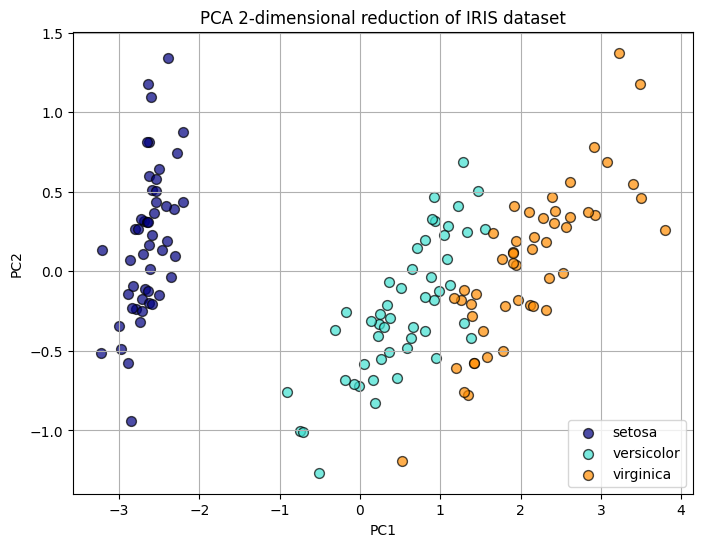

In [104]:
# Plot the PCA-transformed data in 2D
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_names in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca_1[y==i, 0], X_pca_1[y==i, 1], color=color, s=50, ec='k', alpha=0.7, lw=1, label=target_names)
plt.title('PCA 2-dimensional reduction of IRIS dataset',)
plt.xlabel("PC1",)
plt.ylabel("PC2",)
plt.legend(loc='best', shadow=False, scatterpoints=1,)
plt.grid(True)
plt.show()

**What percentage of the original feature space variance do these two combined principal components explain?**

In [105]:
100*pca_1.explained_variance_ratio_.sum()

97.76852063187962

More then 97% of original feature information are covered by these two components

**Reinitialize the PCA model without reducing the dimension**

In [107]:
X_std = StandardScaler().fit_transform(X)
pca_2 = PCA()   # Without reducing dimensions
X_pca_2 = pca_2.fit_transform(X_scaled)

In [108]:
variance_ratio = pca_2.explained_variance_ratio_
variance_ratio

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

**Plotting `explained_variance_ratio_` for individual features**

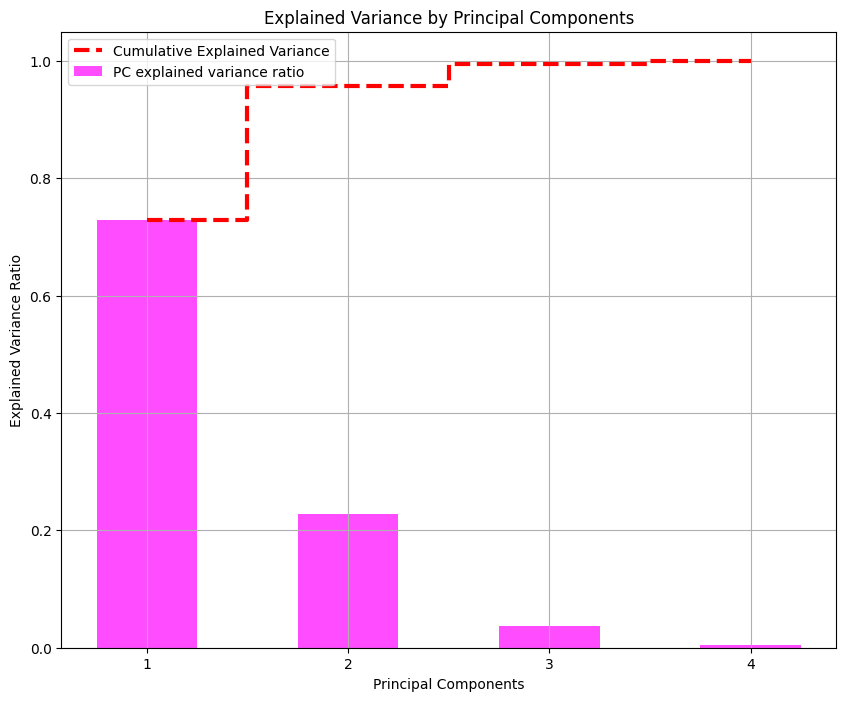

In [122]:
plt.figure(figsize=(10, 8))
plt.bar(x=range(1, len(variance_ratio)+1), height=variance_ratio, color='magenta', alpha=0.7, align='center', label='PC explained variance ratio', width=0.5)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Plot cumulative explained variance
cumulative_variance = np.cumsum(variance_ratio)
plt.step(range(1, len(cumulative_variance)+1), cumulative_variance, where='mid', ls='--', lw=3, color='red', label='Cumulative Explained Variance')
plt.xticks(range(1, 5))
plt.legend(loc='best')
plt.grid(True)
plt.show()

**What does the red dashed line indicate to you?**</br>
The red dashed line in your plot is a cumulative explained variance plot.
* It tells you how much total variance in the dataset is captured as you add more principal components.
* Each “step” on the line shows the total variance explained by the first N components.

**What would you consider doing if your wanted to suppress some noise in your data?**</br>
* Keep only the components with high explained variance
* Noise usually lives in the lower-variance components.
* So, if the first few PCs explain ~90–95% of the variance, you can drop the rest (which mostly capture noise).